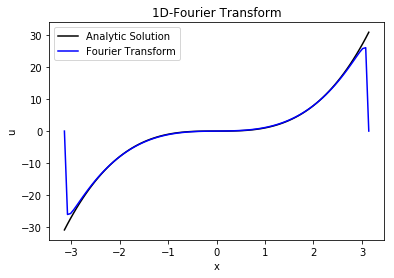

In [37]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
L = np.pi
xpts = np.linspace(-L, L, N)

def u(x):
    return x ** 3

def ak(x, k):
    global L
    return np.cos(k * np.pi * x / L) * u(x)

def bk(x, k):
    global L
    return np.sin(k * np.pi * x / L) * u(x)

def simpInt(f, a, b):
    N = 1000
    h = abs(b - a) / N
    s = f(a) + f(b)
    s1 = 0
    for k in range(1, N, 2):
        s1 += f(a + k * h)
    s2 = 0
    for k in range(2, N - 1, 2):
        s2 += f(a + k * h)
    s += 4 * s1 + 2 * s2
    return (h / 3) * s

def fourierInt(f, a, b, l):
    N = 1000
    h = abs(b - a) / N
    s = f(a, l) + f(b, l)
    s1 = 0
    for k in range(1, N, 2):
        s1 += f(a + k * h, l)
    s2 = 0
    for k in range(2, N - 1, 2):
        s2 += f(a + k * h, l)
    s += 4 * s1 + 2 * s2
    return (h / 3) * s

def fourierCoeff(f, a, b):
    global n, xpts
    akpts = []
    bkpts = []
    for i in range(1, n + 1):
        akpts.append(fourierInt(ak, -L, L, i) / L)
        bkpts.append(fourierInt(bk, -L, L, i) / L)
    a0 = simpInt(u, -L, L) / (2 * L)
    un = []
    for i in xpts:
        uni = a0
        for j in range(1, n + 1):
            uni += akpts[j - 1] * np.cos(j * i * np.pi / L) + bkpts[j - 1] * np.sin(j * i * np.pi / L)
        un.append(uni)
    return un

soln = list(map(u, xpts))
fou = fourierCoeff(u, -L, L)
plt.plot(xpts, soln, 'k', label="Analytic Solution")
plt.plot(xpts, fou, 'b', label="Fourier Transform")
plt.xlabel("x")
plt.ylabel("u")
plt.title("1D-Fourier Transform")
plt.legend()
plt.show()